# 1.Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 2.Import Data

In [2]:
Zoo=pd.read_csv('Zoo.csv')
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


# 3.EDA

In [3]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
Zoo.shape

(101, 18)

In [5]:
Zoo.columns

Index([u'animal name', u'hair', u'feathers', u'eggs', u'milk', u'airborne',
       u'aquatic', u'predator', u'toothed', u'backbone', u'breathes',
       u'venomous', u'fins', u'legs', u'tail', u'domestic', u'catsize',
       u'type'],
      dtype='object')

In [6]:
Zoo_data1 = Zoo.rename(columns = {'animal name':'animal_name'})
Zoo_data1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
Zoo_data1.animal_name.value_counts()

frog        2
slowworm    1
giraffe     1
calf        1
kiwi        1
chub        1
squirrel    1
elephant    1
vulture     1
skimmer     1
bear        1
ladybird    1
fruitbat    1
crab        1
flea        1
penguin     1
flamingo    1
worm        1
haddock     1
lynx        1
moth        1
tuatara     1
seawasp     1
mink        1
clam        1
polecat     1
swan        1
opossum     1
antelope    1
pheasant    1
           ..
raccoon     1
wallaby     1
crayfish    1
octopus     1
sole        1
toad        1
hare        1
bass        1
dolphin     1
deer        1
pitviper    1
lion        1
lobster     1
skua        1
seal        1
girl        1
mole        1
starfish    1
pussycat    1
puma        1
vampire     1
duck        1
sealion     1
catfish     1
cavy        1
lark        1
cheetah     1
honeybee    1
goat        1
vole        1
Name: animal_name, Length: 100, dtype: int64

In [8]:
Zoo_data1.drop_duplicates("animal_name",keep='first',inplace=True)

In [9]:
Zoo_data1.shape

(100, 18)

In [10]:
Zoo_data1

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [11]:
## Changing Animal name to categorical variable
## animal name is objective type

In [12]:
Zoo_data1['animal_name']=Zoo_data1['animal_name'].astype('category')

In [13]:
Zoo_data1.info() #Checking data in in Numerical Form 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 18 columns):
animal_name    100 non-null category
hair           100 non-null int64
feathers       100 non-null int64
eggs           100 non-null int64
milk           100 non-null int64
airborne       100 non-null int64
aquatic        100 non-null int64
predator       100 non-null int64
toothed        100 non-null int64
backbone       100 non-null int64
breathes       100 non-null int64
venomous       100 non-null int64
fins           100 non-null int64
legs           100 non-null int64
tail           100 non-null int64
domestic       100 non-null int64
catsize        100 non-null int64
type           100 non-null int64
dtypes: category(1), int64(17)
memory usage: 19.9 KB


In [14]:
Zoo_data1.isnull().sum() #Checking any Nan Values present in Data

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [15]:
Zoo_data1.duplicated().sum() #Checking Any Duplicate Values

0

In [16]:
Zoo_data1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.43000,0.200000,0.580000,0.410000,0.240000,0.350000,0.55,0.600000,0.820000,0.79000,0.070000,0.170000,2.830000,0.750000,0.130000,0.440000,2.810000
std,0.49757,0.402015,0.496045,0.494311,0.429235,0.479372,0.50,0.492366,0.386123,0.40936,0.256432,0.377525,2.040276,0.435194,0.337998,0.498888,2.101923
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.000000,0.000000,2.000000,0.750000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


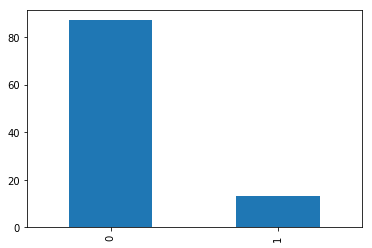

In [17]:
Zoo_data1['domestic'].value_counts(sort=True).plot.bar()
plt.show()

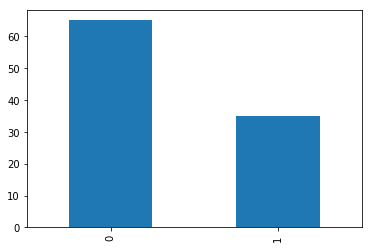

In [18]:
Zoo_data1['aquatic'].value_counts(sort=True).plot.bar()
plt.show()

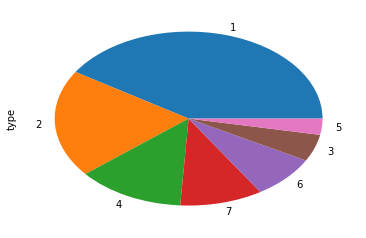

In [19]:
Zoo_data1['type'].value_counts(sort=True).plot.pie()
plt.show()

In [20]:
# Finding Correlation between Variables of Data

## Visualizing The Graphs

In [21]:
cor=Zoo_data1.corr() #to Check correlation Between Variables
cor

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.434277,-0.816046,0.877637,-2.043147e-01,-0.467951,-0.148195,0.503017,0.196633,0.447809,-0.079958,-0.285535,0.401083,3.498557e-02,0.204810,0.450866,-0.558531
feathers,-0.434277,1.000000,0.425481,-0.416808,6.556101e-01,-0.052414,-0.100504,-0.612372,0.234261,0.257790,-0.137176,-0.226285,-0.204429,2.886751e-01,0.029735,-0.141019,-0.193651
eggs,-0.816046,0.425481,1.000000,-0.938420,3.833190e-01,0.369564,0.004073,-0.653451,-0.345957,-0.388996,0.074645,0.169366,-0.230950,-2.105587e-01,-0.153025,-0.511029,0.658967
milk,0.877637,-0.416808,-0.938420,1.000000,-3.732379e-01,-0.355941,-0.022478,0.639142,0.390567,0.429796,-0.228704,-0.160759,0.220042,1.995586e-01,0.161422,0.571804,-0.721456
airborne,-0.204315,0.655610,0.383319,-0.373238,1.000000e+00,-0.166907,-0.291804,-0.592657,-0.102389,0.289731,0.029366,-0.254322,0.047059,-1.650935e-16,0.061269,-0.356606,0.028661
aquatic,-0.467951,-0.052414,0.369564,-0.355941,-1.669075e-01,1.000000,0.368748,0.042796,0.016371,-0.651143,0.045194,0.616748,-0.372313,-1.210455e-02,-0.221313,-0.101368,0.317284
predator,-0.148195,-0.100504,0.004073,-0.022478,-2.918043e-01,0.368748,1.000000,0.123091,0.047088,-0.268959,0.090598,0.195318,-0.105452,3.481553e-02,-0.307814,0.153878,0.052381
toothed,0.503017,-0.612372,-0.653451,0.639142,-5.926573e-01,0.042796,0.123091,1.000000,0.573819,-0.070162,-0.096003,0.369522,-0.199092,3.299832e-01,0.072836,0.353649,-0.484107
backbone,0.196633,0.234261,-0.345957,0.390567,-1.023891e-01,0.016371,0.047088,0.573819,1.000000,0.205774,-0.279523,0.212039,-0.436712,7.513914e-01,0.103712,0.362863,-0.839095
breathes,0.447809,0.257790,-0.388996,0.429796,2.897310e-01,-0.651143,-0.268959,-0.070162,0.205774,1.000000,-0.147224,-0.616347,0.368021,9.922343e-02,0.126297,0.209712,-0.528151


### There is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables.

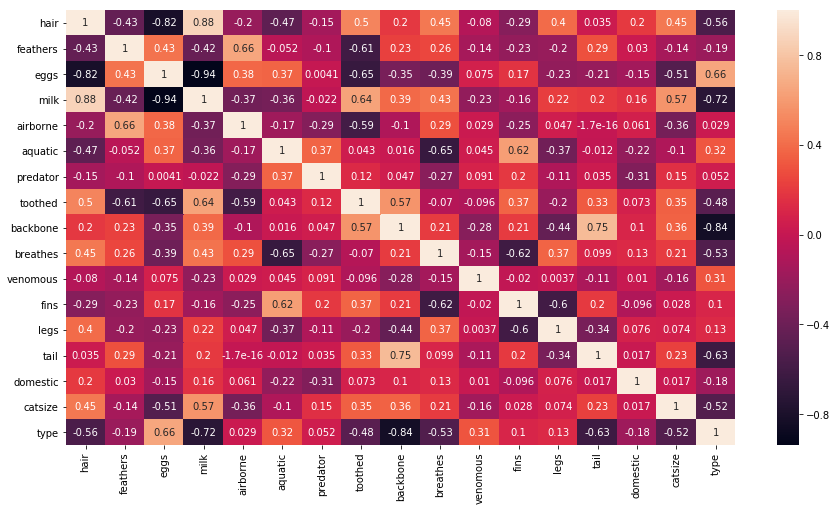

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True)

# Data Modeling/Model Building

In [23]:
X=Zoo_data1.iloc[: , 1:17]
y=Zoo_data1.iloc[: ,17]

In [24]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
X_Train.shape,X_Test.shape,y_Train.shape,y_Test.shape

((70, 16), (30, 16), (70L,), (30L,))

#  Model Training

### Generating 1st Model with K=3 With Training Data

In [25]:
Knn_Model=KNeighborsClassifier(n_neighbors=3)
Knn_Model.fit(X_Train,y_Train)
y_train_Pred=Knn_Model.predict(X_Train)
accuracy_score(y_Train,y_train_Pred)

0.9571428571428572

### Generating 1st Model with K=3 With Testing Data

In [26]:
y_test_Pred=Knn_Model.predict(X_Test)
accuracy_score(y_Test,y_test_Pred)

0.9

### Generating 2nd Model with K=5 With Training Data

In [27]:
Knn_Model=KNeighborsClassifier(n_neighbors=5)
Knn_Model.fit(X_Train,y_Train)
y_Pred=Knn_Model.predict(X_Test)
accuracy_score(y_Pred,y_Test)

0.9

### Generating 2nd Model with K=5 With Testing Data

In [28]:
y_test_Pred1=Knn_Model.predict(X_Test)
accuracy_score(y_Test,y_test_Pred)

0.9

# Find out Optimum No of K

In [29]:
cv_scores=[]
for i in range(1,25,2):
    knn_Model=KNeighborsClassifier(n_neighbors=i)
    cv_score=cross_val_score(estimator=knn_Model, X=X, y=y,cv=5)
    cv_scores.append(cv_score.mean())

In [30]:
cv_scores

[0.9698412698412697,
 0.921067821067821,
 0.8385281385281385,
 0.7997113997113997,
 0.787012987012987,
 0.787012987012987,
 0.7683982683982684,
 0.7683982683982684,
 0.7683982683982684,
 0.76998556998557,
 0.7327561327561327,
 0.7216450216450216]

# Lets'check the Training & Testing accuracy with the K `

In [31]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [32]:
for i, k in enumerate(k_values):
    Knn=KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_Train,y_Train)
    train_accuracy.append(Knn.score(X_Train,y_Train))
    test_accuracy.append(Knn.score(X_Test,y_Test))

## Visualizing the both Training & Testing Data

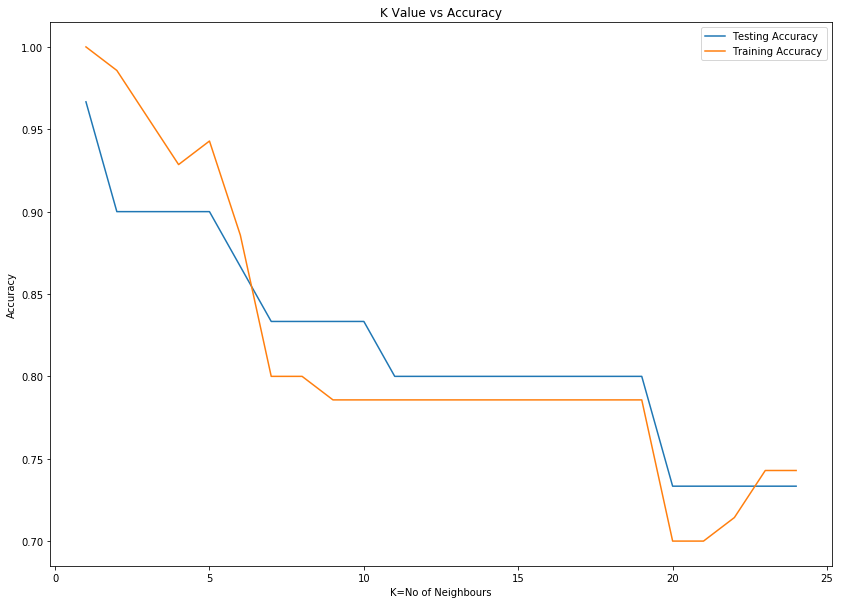

In [33]:
plt.figure(figsize=(14,10))
plt.plot(k_values,test_accuracy,label='Testing Accuracy')
plt.plot(k_values,train_accuracy,label='Training Accuracy')
plt.legend()
plt.title('K Value vs Accuracy')
plt.xlabel('K=No of Neighbours')
plt.ylabel('Accuracy')
plt.show()